***Operador Morfologico***

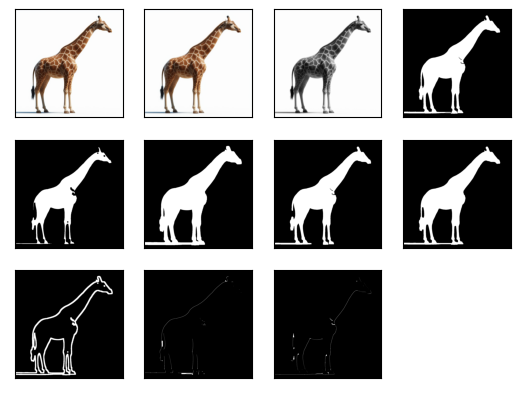

In [10]:
%pip install opencv-python
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

#Importa e converta para RGB
img = cv2.imread('./GIRAFA.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Filtro de ruído (bluring)
img_blur = cv2.blur(img,(5,5))

#Convertendo para preto e branco (RGB -> Gray Scale -> BW)
img_gray = cv2.cvtColor(img_blur, cv2.COLOR_RGB2GRAY)
a = img_gray.max()
_, thresh = cv2.threshold(img_gray, a/2+100, a,cv2.THRESH_BINARY_INV)

#preparando o "kernel"
kernel = np.ones((12,12), np.uint8)

#operadores Morfologicos
img_dilate = cv2.dilate(thresh,kernel,iterations = 1)
img_erode = cv2.erode(thresh,kernel,iterations = 1)
img_open = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
img_close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
img_grad = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, kernel)
img_tophat = cv2.morphologyEx(thresh, cv2.MORPH_TOPHAT, kernel)
img_blackhat = cv2.morphologyEx(thresh, cv2.MORPH_BLACKHAT, kernel)

# Plot the images
imagens = [img, img_blur,  img_gray,thresh,img_erode,img_dilate, img_open, img_close, img_grad,
          img_tophat, img_blackhat]

formatoX = math.ceil(len(imagens)**.5)
if (formatoX**2-len(imagens))>formatoX:
    formatoY = formatoX-1
else:
    formatoY = formatoX

for i in range(len(imagens)):
    plt.subplot(formatoY, formatoX, i + 1)
    plt.imshow(imagens[i],'gray')
    plt.xticks([]),plt.yticks([])
plt.show()



***Espaço Cores***

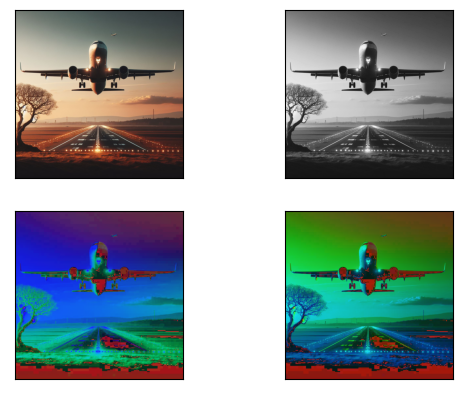

In [6]:
#pip install opencv-python

import numpy as np
import cv2
import matplotlib.pyplot as plt

# Carregans imagem
img = cv2.imread('./Aviao.jpeg')


# Convertendo espaço de cores
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)

#plot imagens
imagens = [img_rgb,img_gray,img_hsv,img_hls]

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(imagens[i],'gray')
    plt.xticks([]),plt.yticks([])
plt.show()




plt.show()


***Contorno***

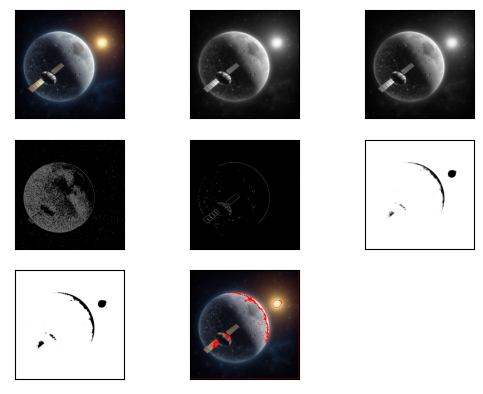

In [7]:
#pip install opencv-python

import math

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Importa e converta para RGB
img = cv2.imread('./Satelite.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



#Convertendo para preto e branco (RGB -> Gray Scale -> BW)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
a = img_gray.max()
_, thresh = cv2.threshold(img_gray, a/2*1.7, a,cv2.THRESH_BINARY_INV)


tamanhoKernel = 5
kernel = np.ones((tamanhoKernel,tamanhoKernel), np.uint8)
thresh_open = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

#Filtro de ruído (bluring)
img_blur = cv2.blur(img_gray, ksize=(tamanhoKernel,tamanhoKernel))

# Detecção borda com Canny (sem blurry)
edges_gray = cv2.Canny(image=img_gray, threshold1=a/2, threshold2=a/2)
# Detecção borda com Canny (com blurry)
edges_blur = cv2.Canny(image=img_blur, threshold1=a/2, threshold2=a/2)



# contorno
contours, hierarchy = cv2.findContours(
                                   image = thresh,
                                   mode = cv2.RETR_TREE,
                                   method = cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv2.contourArea, reverse = True)
img_copy = img.copy()
final = cv2.drawContours(img_copy, contours, contourIdx = -1,
                         color = (255, 0, 0), thickness = 2)


#plot imagens
imagens = [img,img_blur,img_gray,edges_gray,edges_blur,thresh,thresh_open,final]
formatoX = math.ceil(len(imagens)**.5)
if (formatoX**2-len(imagens))>formatoX:
    formatoY = formatoX-1
else:
    formatoY = formatoX
for i in range(len(imagens)):
    plt.subplot(formatoY, formatoX, i + 1)
    plt.imshow(imagens[i],'gray')
    plt.xticks([]),plt.yticks([])
plt.show()
